In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap
from sklearn.decomposition import PCA

## We are going to use UMAP and PCA in isolation to better understand our dataset.

#### We first prepare the data so that we can apply UMAP and PCA.

In [6]:
data = pd.read_csv("Final.csv")
data = data[data['Min'] > 1350]

positions = data['Pos'].values
unique_positions = np.unique(positions)

columns_to_exclude = ['Pos']

data = data.drop(columns=columns_to_exclude + list(data.columns[:9]))
data = data.fillna(0)

colors = ["#e6194B", 
        "#4363d8", 
        "#3cb44b", 
        "#ffe119",  
        "#f032e6",  
        "#46f0f0", 
        "#bcf60c", 
        "#f58231", 
        "#7c3f00",  
        "#fabebe"] 

# **UMAP**

/Users/felputadora/Library/Python/3.9/lib/python/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


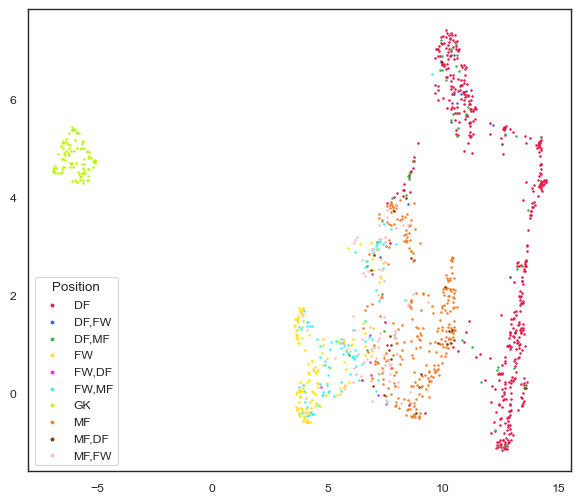

In [7]:
reducer = umap.UMAP(random_state=1)
embedding = reducer.fit_transform(data)

sns.set(context="paper", style="white")

fig, ax = plt.subplots(figsize=(7, 6))

position_to_color = {position: colors[i % len(colors)] for i, position in enumerate(unique_positions)}

for position in unique_positions:
    idx = positions == position
    ax.scatter(embedding[idx, 0], embedding[idx, 1], label=position, color=position_to_color[position], s=1, alpha=1)

legend = ax.legend(markerscale=2, title="Position", loc='best')

plt.show()

# **PCA**

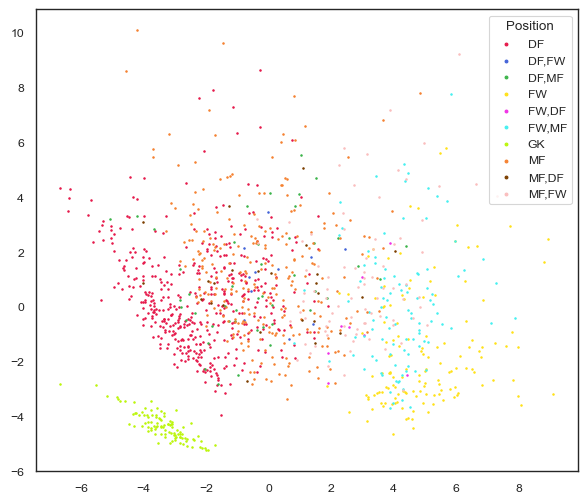

In [8]:
pca = PCA(n_components=2)  
embedding = pca.fit_transform(data)

fig, ax = plt.subplots(figsize=(7, 6))

for position in unique_positions:
    idx = positions == position
    ax.scatter(embedding[idx, 0], embedding[idx, 1], label=position, color=position_to_color[position], s=1, alpha=1)

legend = ax.legend(markerscale=2, title="Position", loc='best')

plt.show()
